In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import the Boston Housing dataset and store in a variable
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [8]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
standarard_X = scalar.fit_transform(X)

## SGDRegressor for linear regression using sklearn lib

In [12]:
clf = linear_model.SGDRegressor()
clf.fit(standarard_X, Y)
Y_Pred = clf.predict(standarard_X)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Finding Optimal weight and Intercept for sklearn SGD

In [13]:
from numpy import c_
print(c_[clf.coef_])
clf.intercept_

[[-0.67749996]
 [ 0.64621265]
 [-0.39311328]
 [ 0.81576085]
 [-0.96565867]
 [ 3.18478262]
 [-0.12571484]
 [-2.03872396]
 [ 0.84166711]
 [-0.59078458]
 [-1.79203067]
 [ 0.92148609]
 [-3.41124639]]


array([22.34568544])

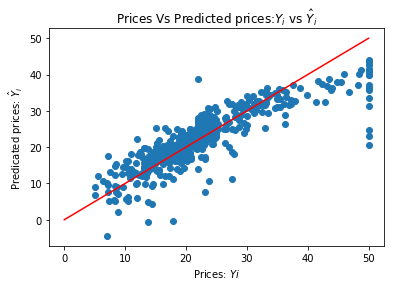

In [14]:
plt.scatter(Y, Y_Pred)
plt.xlabel('Prices: $Yi$')
plt.ylabel('Predicated prices: $\hat{Y}_i$')
plt.title('Prices Vs Predicted prices:$Y_i$ vs $\hat{Y}_i$')
plt.plot([0,50],[0,50], 'r-')

## Plotting Delta Error for Actual Values and Predicted Values

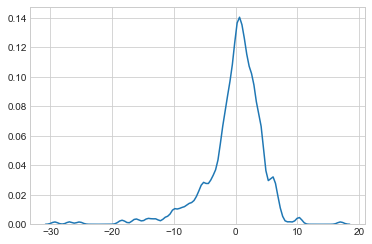

In [15]:
delta_y = Y_Pred - Y
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

## Observation
#Delta: Blue plot indicates Difference between actual values and predicate values


In [16]:
from sklearn.metrics import mean_squared_error
test_MSE = mean_squared_error(Y, Y_Pred)
print("Mean Square Error - Test:", test_MSE)

Mean Square Error - Test: 22.83673830735814


## SGD Regressor for linear regression from scratch

In [17]:
# SGDRegressor for linear regression from scratch which compututes optimal w and MSE 
def Stochastic_Gradient(X,y,weight,learning_rate=0.01,iterations=10):
    """Compute the optimal weight and intercept"""
    m = len(y) #  length of the data set
    
    for it in range(iterations): # iteration 
        sum_error = 0
        
        for i in range(m):
            batch_size = np.random.randint(0,m)  # random batch size for every iteration i.e k batch_size 
            X_i = X[batch_size,:].reshape(1,X.shape[1])
            y_i = y[batch_size].reshape(1,1)
            prediction = np.dot(X_i,weight)
            
            #-------- error ---------
            error = prediction - y_i 
            sum_error += error**2
            #--------- error ---------
            
            weight = weight -(2/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
        
        print('>epoch=%d, l_rate=%.3f, Error=%.3f' % (it, learning_rate, sum_error/m))
                
    return weight

def Predict_Fun(X_b,weight):
    """Predict y using data x and weight"""
    y_pred = X_b.dot(weight)
    y_pred = y_pred.ravel()
    return y_pred

## Implemeting self build SGDRegressor

In [18]:
learning_rate =0.2 #learning_rate
n_iter = 20 #no. of iterations

weight = np.random.randn(14,1) #picking the initial random weight and intercept  

X_b = np.c_[np.ones((len(standarard_X),1)),standarard_X] 

optimal_weight = Stochastic_Gradient(X_b,Y,weight,learning_rate,n_iter)

>epoch=0, l_rate=0.200, Error=395.556
>epoch=1, l_rate=0.200, Error=181.869
>epoch=2, l_rate=0.200, Error=98.556
>epoch=3, l_rate=0.200, Error=61.882
>epoch=4, l_rate=0.200, Error=45.647
>epoch=5, l_rate=0.200, Error=29.031
>epoch=6, l_rate=0.200, Error=28.277
>epoch=7, l_rate=0.200, Error=26.490
>epoch=8, l_rate=0.200, Error=24.004
>epoch=9, l_rate=0.200, Error=22.893
>epoch=10, l_rate=0.200, Error=24.267
>epoch=11, l_rate=0.200, Error=24.692
>epoch=12, l_rate=0.200, Error=23.318
>epoch=13, l_rate=0.200, Error=24.333
>epoch=14, l_rate=0.200, Error=23.878
>epoch=15, l_rate=0.200, Error=24.558
>epoch=16, l_rate=0.200, Error=19.472
>epoch=17, l_rate=0.200, Error=23.463
>epoch=18, l_rate=0.200, Error=24.424
>epoch=19, l_rate=0.200, Error=24.405


## Optimal weights and intercept for self implemented SGDRegressor

In [19]:
print('Optimal Weights for self implemented SGD:\n')
print(optimal_weight[1:])

print('\nIntercept for self implemented SGD:  {:f}'.format(optimal_weight[0][0]))

Optimal Weights for self implemented SGD:

[[-0.61880025]
 [ 0.72740428]
 [-0.25841607]
 [ 0.92167236]
 [-1.27624494]
 [ 2.74003105]
 [ 0.20673248]
 [-2.44157469]
 [ 1.41091106]
 [-0.61422894]
 [-1.93245967]
 [ 1.03213449]
 [-3.9985583 ]]

Intercept for self implemented SGD:  22.658095


## Getting predicted Y using optimal weight for dataset X

In [20]:
Y_Predicted = Predict_Fun(X_b, optimal_weight)

## Graph for predicted Y and actual Y (Self Implemented SGD)

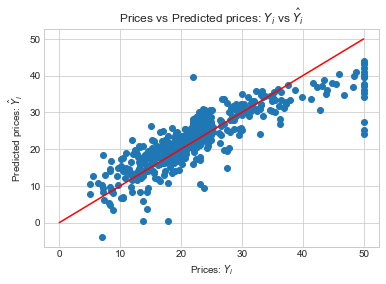

In [21]:
plt.scatter(Y, Y_Predicted)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot([0,50],[0,50], 'r-')
plt.show()

## Plotting Error for Actual Y and Predicted Y

Text(0.5,1,'Error plot for self implemented SGD')

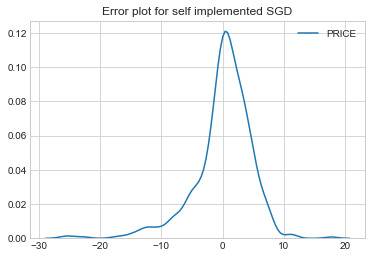

In [22]:
sns.set_style('whitegrid')
sns.kdeplot((Y_Predicted-Y))
plt.title("Error plot for self implemented SGD")

## Mean_square_error for Self implemented SGD

In [23]:
## With reference of the link https://stackoverflow.com/questions/39064684/mean-squared-error-in-python

print("Mean Squared Error using the predicted Y and optimal weights :",np.mean((Y-Y_Predicted)**2))

Mean Squared Error using the predicted Y and optimal weights : 22.58172913281175


## Comparing Sklearn SGD and Self Implemented SGD

Text(0.5,1,'Error plot for Sklearn SGD and Self Implemented SGD')

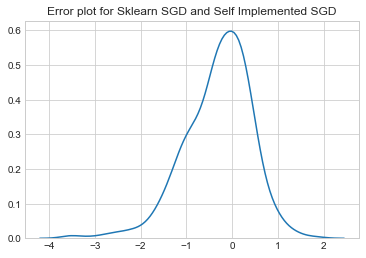

In [24]:
sklearn_pred = Y_Pred 
self_pred = Y_Predicted
sns.set_style('whitegrid')
sns.kdeplot((sklearn_pred-self_pred))
plt.title("Error plot for Sklearn SGD and Self Implemented SGD")

## Optimal weight for Self implemented SGD and SKlearn SGD

In [25]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SGD optimal Weight","Implemented SGD optimal Weight"]

x.add_row(["Sklearn",c_[clf.coef_]])
x.add_row(["Self",optimal_weight[1:]])

print(x)

+--------------------+--------------------------------+
| SGD optimal Weight | Implemented SGD optimal Weight |
+--------------------+--------------------------------+
|      Sklearn       |         [[-0.67749996]         |
|                    |          [ 0.64621265]         |
|                    |          [-0.39311328]         |
|                    |          [ 0.81576085]         |
|                    |          [-0.96565867]         |
|                    |          [ 3.18478262]         |
|                    |          [-0.12571484]         |
|                    |          [-2.03872396]         |
|                    |          [ 0.84166711]         |
|                    |          [-0.59078458]         |
|                    |          [-1.79203067]         |
|                    |          [ 0.92148609]         |
|                    |         [-3.41124639]]         |
|        Self        |         [[-0.61880025]         |
|                    |          [ 0.72740428]   

## Optimal Intercept for Self implemented SGD and SKlearn SGD

In [26]:
print("Sklearn SGD optimal intercept",clf.intercept_)
print("\nSelf implemented SGD optimal intercept",optimal_weight[0][0])

Sklearn SGD optimal intercept [22.34568544]

Self implemented SGD optimal intercept 22.658095494980408


## Conclusion

In [27]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SGD","MSE"]

x.add_row(["Sklearn",clf.intercept_])
x.add_row(["Self",optimal_weight[0][0]])

print(x)

+---------+--------------------+
|   SGD   |        MSE         |
+---------+--------------------+
| Sklearn |   [22.34568544]    |
|   Self  | 22.658095494980408 |
+---------+--------------------+


#### When comparing to scikit-learn linear regression and Self implemented linear regression using optimization algorithm(sgd) in python,  we can see there are not much differences between both of them.